# **Actividad: Construccion de modelo para predecir ganadores de los partidos de futbol**

## **Integrantes:**
- Benjamin De La Torre Rojas
- Mauricio David Correa Hernandez
- Vladlen Shatunov

# 1. **Vamos a leer y cargar los datos con pandas**

In [70]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [71]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    PolynomialFeatures,
    FunctionTransformer,
)

In [72]:
# ANTES DE EMPESAR, MODIFICA EL PATH PARA TU DRIVE.
path_archivo_matches_csv = '/content/gdrive/MyDrive/Semestre_2024.2/06._Introducción_a_Inteligencia_Artificial/Informes/Entrega_Final/Notebook/matches.csv'
#path_archivo_matches_csv = '/content/gdrive/MyDrive/Soccer/matches.csv'
matches = pd.read_csv(path_archivo_matches_csv, index_col=0)

In [73]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,Match Report,NaN,18.0,5.0,14.8,0.0,0,0,2025,Liverpool
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,Match Report,NaN,19.0,8.0,13.6,1.0,0,0,2025,Liverpool
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,Match Report,NaN,11.0,3.0,13.4,0.0,0,0,2025,Liverpool
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,Match Report,NaN,14.0,5.0,14.9,0.0,0,0,2025,Liverpool
5,2024-09-21,15:00,Premier League,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,...,Match Report,NaN,19.0,12.0,16.6,0.0,0,0,2025,Liverpool


In [74]:
matches.shape

(4567, 28)

Limpieza de columnas no importantes.

In [75]:
matches = matches.drop(["comp", "notes", "round", "day", "captain", "referee", "match report", "formation", "opp formation"], axis=1)

In [76]:
matches.shape

(4567, 19)

In [77]:
matches.head()

,date,time,venue,result,gf,ga,opponent,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,team
0,2024-08-17,12:30,Away,W,2.0,0.0,Ipswich Town,2.6,0.5,62.0,30014.0,18.0,5.0,14.8,0.0,0,0,2025,Liverpool
1,2024-08-25,16:30,Home,W,2.0,0.0,Brentford,2.5,0.5,62.0,60017.0,19.0,8.0,13.6,1.0,0,0,2025,Liverpool
2,2024-09-01,16:00,Away,W,3.0,0.0,Manchester Utd,1.8,1.4,47.0,73738.0,11.0,3.0,13.4,0.0,0,0,2025,Liverpool
3,2024-09-14,15:00,Home,L,0.0,1.0,Nott'ham Forest,0.9,0.4,68.0,60344.0,14.0,5.0,14.9,0.0,0,0,2025,Liverpool
5,2024-09-21,15:00,Home,W,3.0,0.0,Bournemouth,2.0,1.1,58.0,60347.0,19.0,12.0,16.6,0.0,0,0,2025,Liverpool


In [78]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4567 entries, 0 to 39
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        4567 non-null   object 
 1   time        4567 non-null   object 
 2   venue       4567 non-null   object 
 3   result      4567 non-null   object 
 4   gf          4567 non-null   float64
 5   ga          4567 non-null   float64
 6   opponent    4567 non-null   object 
 7   xg          4567 non-null   float64
 8   xga         4567 non-null   float64
 9   poss        4567 non-null   float64
 10  attendance  3685 non-null   float64
 11  sh          4567 non-null   float64
 12  sot         4567 non-null   float64
 13  dist        4565 non-null   float64
 14  fk          4567 non-null   float64
 15  pk          4567 non-null   int64  
 16  pkatt       4567 non-null   int64  
 17  season      4567 non-null   int64  
 18  team        4567 non-null   object 
dtypes: float64(10), int64(3), object(6

In [79]:
matches['opponent'].value_counts().sort_index()

,count
opponent,
Arsenal,228
Aston Villa,190
Bournemouth,153
Brentford,115
Brighton,228
Burnley,190
Cardiff City,38
Chelsea,228
Crystal Palace,229


In [80]:
matches = matches[matches['opponent'] != 'Ipswich Town']

# 2. **Vamos a investigar datos faltantes**

38 partidos se juegan cada temporada

20 equipos en cada liga cada temporada

Y tenemos 6 ligas:
- 2018- 2019
- 2019- 2020
- 2021 - 2022
- 2022 - 2023
- 2023 - 2024 se juega actualmente

In [81]:
print(f"Se juegan 38 partidos por equipo (20 equipos) y tenemos 6 temporadas, es decir: {38 * 20 * 6} partidos")
matches.shape

Se juegan 38 partidos por equipo (20 equipos) y tenemos 6 temporadas, es decir: 4560 partidos


(4566, 19)

Deberiamos tener 4560, pero tenemos 4566

En la columna de opponent explicar




In [82]:
mapeo_nombres = {
    'Brighton': 'Brighton and Hove Albion',
    'Huddersfield': 'Huddersfield Town',
    'Manchester Utd': 'Manchester United',
    'Newcastle Utd': 'Newcastle United',
    'Nott\'ham Forest': 'Nottingham Forest',
    'Sheffield Utd': 'Sheffield United',
    'Tottenham': 'Tottenham Hotspur',
    'West Brom': 'West Bromwich Albion',
    'West Ham': 'West Ham United',
    'Wolves': 'Wolverhampton Wanderers',
}

matches['opponent'] = matches['opponent'].replace(mapeo_nombres)

<ipython-input-82-eaf5237281ef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['opponent'] = matches['opponent'].replace(mapeo_nombres)


In [83]:
matches["team"].unique()

array(['Liverpool', 'Manchester City', 'Arsenal', 'Aston Villa',
       'Tottenham Hotspur', 'Chelsea', 'Newcastle United',
       'Manchester United', 'West Ham United', 'Crystal Palace',
       'Brighton and Hove Albion', 'Bournemouth', 'Fulham',
       'Wolverhampton Wanderers', 'Everton', 'Brentford',
       'Nottingham Forest', 'Luton Town', 'Burnley', 'Sheffield United',
       'Leicester City', 'Leeds United', 'Southampton', 'Watford',
       'Norwich City', 'West Bromwich Albion', 'Cardiff City',
       'Huddersfield Town'], dtype=object)

In [84]:
matches['team'].value_counts().sort_index()

,count
team,
Arsenal,228
Aston Villa,190
Bournemouth,152
Brentford,114
Brighton and Hove Albion,228
Burnley,190
Cardiff City,38
Chelsea,228
Crystal Palace,228


Tenemos que tener en cuenta que 3 equipos descienden a una liga menor cada año y 3 equipos ascienden a la Premier League

Esto quiere decir que los equipos:
- Luton Town
- West Bromwich Albion
- Cardiff City
- Huddersfield Town

Con 38 partidos jugados, solo han estado en una temporada de las 6 que tenemos, por que en cada temporada cada equipo juega 38 partidos.

Los equipos:
- Norwich City
- Nottingham Forest

Con 76 partidos han jugado 2 de las 6 temporadas que tenemos

Los equipos:
- Brentford
- Sheffield United
- Leeds United
- Watford

Con 114 partidos han jugado 3 de las 6 temporadas

Los equipos:
- Fulham
- Bournemouth

Con 152 partidos han jugado 4 de las 6 temporadas

Los equipos:
- Southampton
- Leicester City
- Burnley
- Aston Villa

Con 190 partidos han jugado 5 de las 6 temporadas

Los equipos:
- Manchester United
- Manchester City
- Wolverhampton Wanderers
- Brighton and Hove Albion
- Crystal Palace
- West Ham United
- Everton
- Newcastle United
- Arsenal
- Tottenham Hotspur
- Chelsea

Con 228 partidos han jugado 6 de las 6 temporadas

Y finalmente
- Liverpool	235 ha jugado en las 6 de las 6 temporadas, pero como la temporada 2024-2025 se esta jugando actualmente, Liverpool ha jugado unos cuantos partidos más.

In [85]:
matches[matches["team"] == "Liverpool"]

,date,time,venue,result,gf,ga,opponent,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,team
1,2024-08-25,16:30,Home,W,2.0,0.0,Brentford,2.5,0.5,62.0,60017.0,19.0,8.0,13.6,1.0,0,0,2025,Liverpool
2,2024-09-01,16:00,Away,W,3.0,0.0,Manchester United,1.8,1.4,47.0,73738.0,11.0,3.0,13.4,0.0,0,0,2025,Liverpool
3,2024-09-14,15:00,Home,L,0.0,1.0,Nottingham Forest,0.9,0.4,68.0,60344.0,14.0,5.0,14.9,0.0,0,0,2025,Liverpool
5,2024-09-21,15:00,Home,W,3.0,0.0,Bournemouth,2.0,1.1,58.0,60347.0,19.0,12.0,16.6,0.0,0,0,2025,Liverpool
7,2024-09-28,17:30,Away,W,2.0,1.0,Wolverhampton Wanderers,2.5,0.6,55.0,31413.0,9.0,5.0,18.0,1.0,1,1,2025,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,2019-04-14,16:30,Home,W,2.0,0.0,Chelsea,1.2,0.7,62.0,53279.0,15.0,7.0,17.9,0.0,0,0,2020,Liverpool
46,2019-04-21,16:00,Away,W,2.0,0.0,Cardiff City,3.0,1.1,75.0,33082.0,16.0,5.0,18.0,1.0,1,1,2020,Liverpool
47,2019-04-26,20:00,Home,W,5.0,0.0,Huddersfield Town,3.1,0.2,69.0,53249.0,21.0,7.0,16.6,0.0,0,0,2020,Liverpool
49,2019-05-04,19:45,Away,W,3.0,2.0,Newcastle United,1.2,1.4,69.0,52206.0,11.0,4.0,12.8,0.0,0,0,2020,Liverpool


# 3. **Limpiamos los data para el modelo de machine learning**

In [86]:
matches.dtypes

,0
date,object
time,object
venue,object
result,object
gf,float64
ga,float64
opponent,object
xg,float64
xga,float64
poss,float64


Vamos a convertir la columna date a datetime en pandas que nos serviran para añadir mas propiedades al modelo

In [87]:
matches["date"] = pd.to_datetime(matches["date"])

In [88]:
matches.dtypes

,0
date,datetime64[ns]
time,object
venue,object
result,object
gf,float64
ga,float64
opponent,object
xg,float64
xga,float64
poss,float64


# ONE HOT ENCODING

In [89]:
matches = pd.get_dummies(matches, columns=['opponent', 'team'], drop_first=True)
matches.head()

,date,time,venue,result,gf,ga,xg,xga,poss,attendance,...,team_Newcastle United,team_Norwich City,team_Nottingham Forest,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers
1,2024-08-25,16:30,Home,W,2.0,0.0,2.5,0.5,62.0,60017.0,...,False,False,False,False,False,False,False,False,False,False
2,2024-09-01,16:00,Away,W,3.0,0.0,1.8,1.4,47.0,73738.0,...,False,False,False,False,False,False,False,False,False,False
3,2024-09-14,15:00,Home,L,0.0,1.0,0.9,0.4,68.0,60344.0,...,False,False,False,False,False,False,False,False,False,False
5,2024-09-21,15:00,Home,W,3.0,0.0,2.0,1.1,58.0,60347.0,...,False,False,False,False,False,False,False,False,False,False
7,2024-09-28,17:30,Away,W,2.0,1.0,2.5,0.6,55.0,31413.0,...,False,False,False,False,False,False,False,False,False,False


In [90]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4566 entries, 1 to 39
Data columns (total 71 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date                               4566 non-null   datetime64[ns]
 1   time                               4566 non-null   object        
 2   venue                              4566 non-null   object        
 3   result                             4566 non-null   object        
 4   gf                                 4566 non-null   float64       
 5   ga                                 4566 non-null   float64       
 6   xg                                 4566 non-null   float64       
 7   xga                                4566 non-null   float64       
 8   poss                               4566 non-null   float64       
 9   attendance                         3684 non-null   float64       
 10  sh                                 4566 non

# 3. **CREAMOS LOS PREDICTORES PARA EL MODELO**

vamos a crear los predictores para el primer modelo que entrenaremos y luego mejoraremos con el tiempo

In [91]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
matches["day_code"] = matches["date"].dt.dayofweek
matches["target"] = (matches["result"] == "W").astype("int")

In [92]:
matches.head()

,date,time,venue,result,gf,ga,xg,xga,poss,attendance,...,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers,venue_code,hour,day_code,target
1,2024-08-25,16:30,Home,W,2.0,0.0,2.5,0.5,62.0,60017.0,...,False,False,False,False,False,False,1,16,6,1
2,2024-09-01,16:00,Away,W,3.0,0.0,1.8,1.4,47.0,73738.0,...,False,False,False,False,False,False,0,16,6,1
3,2024-09-14,15:00,Home,L,0.0,1.0,0.9,0.4,68.0,60344.0,...,False,False,False,False,False,False,1,15,5,0
5,2024-09-21,15:00,Home,W,3.0,0.0,2.0,1.1,58.0,60347.0,...,False,False,False,False,False,False,1,15,5,1
7,2024-09-28,17:30,Away,W,2.0,1.0,2.5,0.6,55.0,31413.0,...,False,False,False,False,False,False,0,17,5,1


In [93]:
matches = pd.get_dummies(matches, columns=['hour', "day_code"], drop_first=True)

In [94]:
matches.head()

,date,time,venue,result,gf,ga,xg,xga,poss,attendance,...,hour_17,hour_18,hour_19,hour_20,day_code_1,day_code_2,day_code_3,day_code_4,day_code_5,day_code_6
1,2024-08-25,16:30,Home,W,2.0,0.0,2.5,0.5,62.0,60017.0,...,False,False,False,False,False,False,False,False,False,True
2,2024-09-01,16:00,Away,W,3.0,0.0,1.8,1.4,47.0,73738.0,...,False,False,False,False,False,False,False,False,False,True
3,2024-09-14,15:00,Home,L,0.0,1.0,0.9,0.4,68.0,60344.0,...,False,False,False,False,False,False,False,False,True,False
5,2024-09-21,15:00,Home,W,3.0,0.0,2.0,1.1,58.0,60347.0,...,False,False,False,False,False,False,False,False,True,False
7,2024-09-28,17:30,Away,W,2.0,1.0,2.5,0.6,55.0,31413.0,...,True,False,False,False,False,False,False,False,True,False


In [95]:
scaler = MinMaxScaler()
data_to_scale = matches[["gf", "ga", "xg","xga", "poss", "attendance", "sh", "sot", "dist", "fk", "pk", "pkatt"]]
model=scaler.fit(data_to_scale)
scaled_data = model.transform(data_to_scale)

In [96]:
# Convertir el array escalado a un DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=["gf", "ga", "xg", "xga", "poss", "attendance", "sh", "sot", "dist", "fk", "pk", "pkatt"])

# Asegurarse de que el DataFrame escalado tenga el mismo índice que el DataFrame original
scaled_df.index = matches.index

# Dropear las columnas originales del DataFrame 'matches'
matches.drop(["gf", "ga", "xg", "xga", "poss", "attendance", "sh", "sot", "dist", "fk", "pk", "pkatt"], axis=1, inplace=True)

# Concatenar el DataFrame original sin esas columnas y el DataFrame escalado
matches = pd.concat([matches, scaled_df], axis=1)

In [97]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4566 entries, 1 to 39
Data columns (total 87 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date                               4566 non-null   datetime64[ns]
 1   time                               4566 non-null   object        
 2   venue                              4566 non-null   object        
 3   result                             4566 non-null   object        
 4   season                             4566 non-null   int64         
 5   opponent_Aston Villa               4566 non-null   bool          
 6   opponent_Bournemouth               4566 non-null   bool          
 7   opponent_Brentford                 4566 non-null   bool          
 8   opponent_Brighton and Hove Albion  4566 non-null   bool          
 9   opponent_Burnley                   4566 non-null   bool          
 10  opponent_Cardiff City              4566 non

In [98]:
# Eliminar venue y result de matches.
matches = matches.drop(["venue", "result", "time", "season"], axis=1)

In [99]:
matches_encode_path = '/content/gdrive/MyDrive/Semestre_2024.2/06._Introducción_a_Inteligencia_Artificial/Informes/Entrega_Final/Notebook/matches_encode.csv'
#matches_encode_path = '/content/gdrive/MyDrive/Soccer/Soccermatches_encode.csv'
matches.to_csv(matches_encode_path)

In [100]:
matches.columns

Index(['date', 'opponent_Aston Villa', 'opponent_Bournemouth',
       'opponent_Brentford', 'opponent_Brighton and Hove Albion',
       'opponent_Burnley', 'opponent_Cardiff City', 'opponent_Chelsea',
       'opponent_Crystal Palace', 'opponent_Everton', 'opponent_Fulham',
       'opponent_Huddersfield Town', 'opponent_Leeds United',
       'opponent_Leicester City', 'opponent_Liverpool', 'opponent_Luton Town',
       'opponent_Manchester City', 'opponent_Manchester United',
       'opponent_Newcastle United', 'opponent_Norwich City',
       'opponent_Nottingham Forest', 'opponent_Sheffield United',
       'opponent_Southampton', 'opponent_Tottenham Hotspur',
       'opponent_Watford', 'opponent_West Bromwich Albion',
       'opponent_West Ham United', 'opponent_Wolverhampton Wanderers',
       'team_Aston Villa', 'team_Bournemouth', 'team_Brentford',
       'team_Brighton and Hove Albion', 'team_Burnley', 'team_Cardiff City',
       'team_Chelsea', 'team_Crystal Palace', 'team_Everton

In [101]:
# Nuevos predictores incluyendo one-hot encoded columns
predictors = [
    "venue_code",
    "gf", "ga", "xg", "xga", "poss", "attendance", "sh", "sot", "dist", "fk", "pk", "pkatt"
]
predictors += [col for col in matches.columns if "day_code_" in col]
predictors += [col for col in matches.columns if "hour_" in col]
predictors += [col for col in matches.columns if "opponent_" in col]
predictors += [col for col in matches.columns if "team_" in col]

# Verificar los predictores
print(predictors)

['venue_code', 'gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'day_code_1', 'day_code_2', 'day_code_3', 'day_code_4', 'day_code_5', 'day_code_6', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'opponent_Aston Villa', 'opponent_Bournemouth', 'opponent_Brentford', 'opponent_Brighton and Hove Albion', 'opponent_Burnley', 'opponent_Cardiff City', 'opponent_Chelsea', 'opponent_Crystal Palace', 'opponent_Everton', 'opponent_Fulham', 'opponent_Huddersfield Town', 'opponent_Leeds United', 'opponent_Leicester City', 'opponent_Liverpool', 'opponent_Luton Town', 'opponent_Manchester City', 'opponent_Manchester United', 'opponent_Newcastle United', 'opponent_Norwich City', 'opponent_Nottingham Forest', 'opponent_Sheffield United', 'opponent_Southampton', 'opponent_Tottenham Hotspur', 'opponent_Watford', 'opponent_West Bromwich Albion', 'opponent_West Ham United', 'opponent_Wolverhampton Wanderers', 'team_Aston Villa

# 4. **Creamos el primer modelo incial**

In [102]:
# Defineamos los modelos base (un random forest):
rf_base = RandomForestClassifier(random_state=1)

# Definamos la malla de parámetros sobre la que haremos la búsqueda:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': list(range(2, 8)),
    'classifier__min_samples_leaf': [1, 10, 50]
}

pipeline_rf = Pipeline(steps = [
    ('classifier', rf_base),
                            ])

# Definamos nuestros modelo mediante GridSearchCV:
rf = GridSearchCV(pipeline_rf, cv=3, param_grid=param_grid)


In [103]:
# Asegurando que 'X' sea un DataFrame con las columnas especificadas
X = matches[predictors]  # Aquí es donde usas la lista de predictores para seleccionar las columnas del DataFrame 'matches'

# 'y' ya está definida correctamente
y = matches["target"]

# Aplicar train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (3652, 81)
Dimensiones de X_test: (914, 81)
Dimensiones de y_train: (3652,)
Dimensiones de y_test: (914,)


In [104]:
%%time
# Entrenar el modelo con el conjunto de entrenamiento
rf.fit(X_train, y_train)

CPU times: user 22.2 s, sys: 65.2 ms, total: 22.2 s
Wall time: 22.4 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=1))]),
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7],
                         'classifier__min_samples_leaf': [1, 10, 50],
                         'classifier__n_estimators': [50, 100]})

In [105]:
# Obtengamos los mejores hiperparámetros encontrados para el random forest:
rf.best_params_

{'classifier__max_depth': 7,
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 50}

In [106]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = rf.predict(X_test)
# Imprimir las predicciones
print("Predicciones:", y_pred)

Predicciones: [0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0
 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1
 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0
 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1
 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0
 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0
 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 0 0 0 0 1 

In [107]:
# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo en el conjunto de prueba:", accuracy)

Precisión del modelo en el conjunto de prueba: 0.9748358862144421


In [108]:
# Mostrar el informe de clasificación
print("Informe de clasificación:\n", classification_report(y_test, y_pred))

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       555
           1       0.98      0.95      0.97       359

    accuracy                           0.97       914
   macro avg       0.98      0.97      0.97       914
weighted avg       0.97      0.97      0.97       914



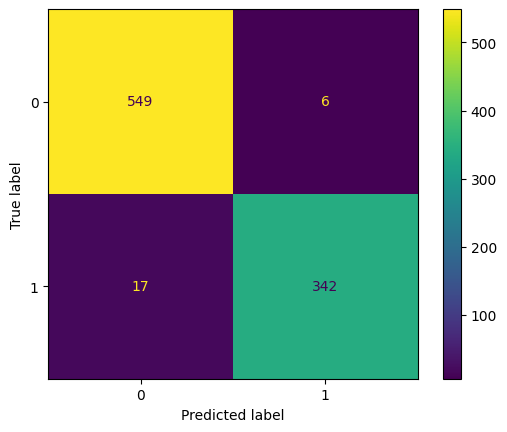

In [109]:
# Grafiquemos la matriz de confusión del random foresr para los datos de prueba (sin normalizar):
cm = confusion_matrix(y_test,rf.predict(X_test))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# **5. Vamos a preparar los datos para hacer la prediccion**

In [110]:
# Crear un DataFrame con una fila de ceros
data = np.zeros((1, len(predictors)))
new_match = pd.DataFrame(data, columns=predictors)
new_match.columns

Index(['venue_code', 'gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh',
       'sot', 'dist', 'fk', 'pk', 'pkatt', 'day_code_1', 'day_code_2',
       'day_code_3', 'day_code_4', 'day_code_5', 'day_code_6', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'opponent_Aston Villa', 'opponent_Bournemouth',
       'opponent_Brentford', 'opponent_Brighton and Hove Albion',
       'opponent_Burnley', 'opponent_Cardiff City', 'opponent_Chelsea',
       'opponent_Crystal Palace', 'opponent_Everton', 'opponent_Fulham',
       'opponent_Huddersfield Town', 'opponent_Leeds United',
       'opponent_Leicester City', 'opponent_Liverpool', 'opponent_Luton Town',
       'opponent_Manchester City', 'opponent_Manchester United',
       'opponent_Newcastle United', 'opponent_Norwich City',
       'opponent_Nottingham Forest', 'opponent_Sheffield United',
       'opponent_Southampton', 'opponent_Tottenham Hotspur',
       'opponent_Watford', 'opponent_

In [111]:
# Establecer características específicas para el partido
# Asumiendo que 'team_Liverpool' es local y 'team_Watford' es visitante

#team = 'team_Manchester City'
#opponent = 'opponent_Leicester City'

#team = 'team_Manchester United'
#opponent = 'opponent_Leicester City'

team = 'team_Leicester City'
opponent = 'opponent_Manchester United'

#team = 'team_Aston Villa'
#opponent = 'opponent_Liverpool'

#team = 'team_Liverpool'
#opponent = 'opponent_Aston Villa'

#team = 'team_Brighton and Hove Albion'
#opponent = 'opponent_Manchester United'

#team = 'team_Fulham'
#opponent = 'opponent_Crystal Palace'

#opponent = 'opponent_Fulham'
#team = 'team_Crystal Palace'

#team = 'team_Brentford'
#opponent = 'opponent_Bournemouth'

new_match[team] = 1
#new_match['team_Brighton and Hove Albion'] = 1
new_match[opponent] = 1
#new_match['opponent_Manchester United'] = 1

In [112]:
# Asumiendo que 'date' es una columna en 'matches' y ya está en formato datetime
matches['date'] = pd.to_datetime(matches['date'])
liverpool_matches = matches[matches[team] == 1]

# Ordenar los partidos por fecha y seleccionar los últimos 30
liverpool_recent = liverpool_matches.sort_values(by='date', ascending=False).head(15)
liverpool_recent

,date,opponent_Aston Villa,opponent_Bournemouth,opponent_Brentford,opponent_Brighton and Hove Albion,opponent_Burnley,opponent_Cardiff City,opponent_Chelsea,opponent_Crystal Palace,opponent_Everton,...,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt
44,2023-05-28,False,False,False,False,False,False,False,False,False,...,0.200000,0.200000,0.468750,0.380464,0.361111,0.266667,0.352601,0.00,0.000000,0.000000
43,2023-05-22,False,False,False,False,False,False,False,False,False,...,0.014286,0.300000,0.078125,0.632179,0.027778,0.066667,0.164740,0.00,0.000000,0.000000
42,2023-05-15,False,False,False,False,False,False,False,False,False,...,0.057143,0.314286,0.250000,0.380994,0.111111,0.266667,0.234104,0.00,0.000000,0.000000
41,2023-05-08,False,False,False,False,False,False,False,False,False,...,0.400000,0.228571,0.390625,0.282887,0.444444,0.466667,0.450867,0.50,0.333333,0.666667
40,2023-05-01,False,False,False,False,False,False,False,False,True,...,0.485714,0.442857,0.562500,0.380338,0.388889,0.266667,0.393064,0.00,0.000000,0.333333
39,2023-04-25,False,False,False,False,False,False,False,False,False,...,0.300000,0.214286,0.640625,0.436974,0.416667,0.200000,0.234104,0.25,0.000000,0.000000
38,2023-04-22,False,False,False,False,False,False,False,False,False,...,0.342857,0.128571,0.375000,0.378826,0.388889,0.400000,0.395954,0.00,0.333333,0.333333
37,2023-04-15,False,False,False,False,False,False,False,False,False,...,0.328571,0.228571,0.187500,0.647015,0.305556,0.266667,0.260116,0.00,0.000000,0.000000
36,2023-04-08,False,True,False,False,False,False,False,False,False,...,0.085714,0.271429,0.515625,0.379343,0.388889,0.266667,0.335260,0.00,0.000000,0.000000
35,2023-04-04,True,False,False,False,False,False,False,False,False,...,0.071429,0.142857,0.281250,0.379254,0.250000,0.266667,0.329480,0.25,0.000000,0.000000


In [113]:
# Calcular el promedio de las estadísticas de interés
average_stats = liverpool_recent[['gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']].mean()

# Mostrar las estadísticas promedio
print(average_stats)

gf            0.111111
ga            0.200000
xg            0.207619
xga           0.227619
poss          0.409375
attendance    0.391681
sh            0.290741
sot           0.222222
dist          0.340270
fk            0.083333
pk            0.044444
pkatt         0.088889
dtype: float64


In [114]:
# Establecer los valores estadísticos promedio en el nuevo partido
for stat in ['gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']:
    new_match[stat] = average_stats[stat]
new_match.columns

Index(['venue_code', 'gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh',
       'sot', 'dist', 'fk', 'pk', 'pkatt', 'day_code_1', 'day_code_2',
       'day_code_3', 'day_code_4', 'day_code_5', 'day_code_6', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'opponent_Aston Villa', 'opponent_Bournemouth',
       'opponent_Brentford', 'opponent_Brighton and Hove Albion',
       'opponent_Burnley', 'opponent_Cardiff City', 'opponent_Chelsea',
       'opponent_Crystal Palace', 'opponent_Everton', 'opponent_Fulham',
       'opponent_Huddersfield Town', 'opponent_Leeds United',
       'opponent_Leicester City', 'opponent_Liverpool', 'opponent_Luton Town',
       'opponent_Manchester City', 'opponent_Manchester United',
       'opponent_Newcastle United', 'opponent_Norwich City',
       'opponent_Nottingham Forest', 'opponent_Sheffield United',
       'opponent_Southampton', 'opponent_Tottenham Hotspur',
       'opponent_Watford', 'opponent_

In [115]:
new_match.head()

,venue_code,gf,ga,xg,xga,poss,attendance,sh,sot,dist,...,team_Newcastle United,team_Norwich City,team_Nottingham Forest,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers
0,0.0,0.111111,0.2,0.207619,0.227619,0.409375,0.391681,0.290741,0.222222,0.34027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
# Hacer la predicción usando el modelo entrenado
prediction = rf.predict(new_match)
print("Predicción del resultado:", f"El equipo {team} ganará." if prediction[0] == 1 else f"El equipo {team} perderá o empatará.")


Predicción del resultado: El equipo team_Leicester City perderá o empatará.


# 9. **Creemos una interfaz grafica**

# **Para utilizar en Colab.**

## **Opción 1.**

In [117]:
# Crear un DataFrame con una fila de ceros
data_for_interfaz = np.zeros((1, len(predictors)))
new_match_for_interfaz = pd.DataFrame(data_for_interfaz, columns=predictors)
#new_match_for_interfaz.columns

In [118]:
teams = {
  1:'team_Aston Villa', 2:'team_Bournemouth', 3:'team_Brentford', 4:'team_Brighton and Hove Albion', 5:'team_Burnley',
  6:'team_Cardiff City', 7:'team_Chelsea', 8:'team_Crystal Palace', 9:'team_Everton', 10:'team_Fulham',
  11:'team_Huddersfield Town', 12:'team_Leeds United', 13:'team_Leicester City', 14:'team_Liverpool', 15:'team_Luton Town',
  16:'team_Manchester City', 17:'team_Manchester United', 18:'team_Newcastle United', 19:'team_Norwich City', 20:'team_Nottingham Forest',
  21:'team_Sheffield United', 22:'team_Southampton', 23:'team_Tottenham Hotspur', 24:'team_Watford', 25:'team_West Bromwich Albion',
  26:'team_West Ham United', 27:'team_Wolverhampton Wanderers'
}
opponents = {
  1:'opponent_Aston Villa', 2:'opponent_Bournemouth', 3:'opponent_Brentford', 4:'opponent_Brighton and Hove Albion', 5:'opponent_Burnley',
  6:'opponent_Cardiff City', 7:'opponent_Chelsea', 8:'opponent_Crystal Palace', 9:'opponent_Everton', 10:'opponent_Fulham',
  11:'opponent_Huddersfield Town', 12:'opponent_Leeds United', 13:'opponent_Leicester City', 14:'opponent_Liverpool', 15:'opponent_Luton Town',
  16:'opponent_Manchester City', 17:'opponent_Manchester United', 18:'opponent_Newcastle United', 19:'opponent_Norwich City', 20:'opponent_Nottingham Forest',
  21:'opponent_Sheffield United', 22:'opponent_Southampton', 23:'opponent_Tottenham Hotspur', 24:'opponent_Watford', 25:'opponent_West Bromwich Albion',
  26:'opponent_West Ham United', 27:'opponent_Wolverhampton Wanderers'
}

In [119]:
teams_to_print = {}
for key, value in teams.items():
  value = value.replace('team_', '')
  teams_to_print[key] = value

In [120]:
def imprimir_equipos(teams):
  # Dividir los equipos en columnas
  # Calcular cuántas filas necesitamos (división por columnas)
  columns = 3
  rows = (len(teams) + columns - 1) // columns  # Redondear hacia arriba

  # Crear una lista de listas, una para cada columna
  organized_teams = [[] for _ in range(rows)]

  # Llenar cada columna con los equipos en orden
  for index, (code, team) in enumerate(teams.items()):
      row_index = index % rows
      organized_teams[row_index].append((code, team))

  # Imprimir la tabla con el encabezado
  print("TABLA DE EQUIPOS DISPONIBLES PARA EL ANÁLISIS.")
  print("¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯")

  print("._______________________________________________________________________________________________________________.")
  print("||--------|--------------------------||--------|--------------------------||--------|--------------------------||")
  print("|| Codigo | Equipo                   || Codigo | Equipo                   || Codigo | Equipo                   ||")
  print("||--------|--------------------------||--------|--------------------------||--------|--------------------------||")

  # Imprimir cada fila de la tabla en formato de columnas
  for row in organized_teams:
      row_display = []
      for code, team in row:
          row_display.append(f"||  {code:<5} | {team:<25}")

      # Completar las columnas vacías si faltan equipos en la última fila
      row_display += ["||        |                          "] * (columns - len(row))

      # Imprimir la fila formateada
      print("".join(row_display) + "||")

      # Línea separadora
      print("||--------|--------------------------||--------|--------------------------||--------|--------------------------||")
  print("¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯")


In [121]:
def solicitar_confirmacion_team_oponent(teams_to_print, prompt, valor_invalido_msg="Valor no válido. Verifícalo e Inténtalo de nuevo."):
  teams = teams_to_print
  while True:
    valor = input(prompt)
    print(f"El equipo seleccionado es: \'{teams[int(valor)]}\'")
    confirmacion = input("¿El valor ingresado es correcto? (si/no): ").lower()
    if confirmacion == "si":
        return valor
    else:
        print(valor_invalido_msg)

In [122]:
def solicitar_confirmacion(prompt, valor_invalido_msg="Valor no válido. Verifícalo e Inténtalo de nuevo."):
  while True:
    valor = input(prompt)
    print(f"El valor ingresado es: {valor}")
    confirmacion = input("¿El valor ingresado es correcto? (si/no): ").lower()
    if confirmacion == "si":
        return valor
    else:
        print(valor_invalido_msg)

In [ ]:
imprimir_equipos(teams_to_print)

# Información básica del próximo partido
print("\nINGRESA LOS EL EQUIPO Y EL OPONENTE PARA EL PARTIDO...")
print("¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯\n\n")

# Validar selección del equipo
team = int(solicitar_confirmacion_team_oponent(teams_to_print, "Ingresa el código del equipo que quieres chequear: "))
# Validar selección del oponente
opponent = int(solicitar_confirmacion_team_oponent(teams_to_print, "\nIngresa el código del oponente: "))

while(team == opponent):
  print("\n\nLOS EQUIPOS NO PUEDEN SER EL MISMO EQUIPO.")
  print("¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯\n\n")
  print("INGRESA NUEVAMENTE LOS EL EQUIPO Y EL OPONENTE PARA EL PARTIDO...")
  print("¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯\n")
  # Validar selección del equipo
  team = int(solicitar_confirmacion_team_oponent(teams_to_print, "Ingresa el código del equipo que quieres chequear: "))
  # Validar selección del oponente
  opponent = int(solicitar_confirmacion_team_oponent(teams_to_print, "\nIngresa el código del oponente: "))

new_match_for_interfaz[teams[team]] = 1
new_match_for_interfaz[opponents[opponent]] = 1

# Asumiendo que 'date' es una columna en 'matches' y ya está en formato datetime
matches['date'] = pd.to_datetime(matches['date'])
team_matches = matches[matches[teams[team]] == 1]

# Ordenar los partidos por fecha y seleccionar los últimos 30
team_recent_matches = team_matches.sort_values(by='date', ascending=False).head(30)

# Calcular el promedio de las estadísticas de interés
average_stats = team_recent_matches[['gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']].mean()

# Establecer los valores estadísticos promedio en el nuevo partido
for stat in ['gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']:
    new_match_for_interfaz[stat] = average_stats[stat]

# Hacer la predicción usando el modelo entrenado
prediction = rf.predict(new_match)
print("\n\nPREDICCIÓN DEL RESULTADO...:")
print("¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯")
print(f"El equipo \'{teams_to_print[team]}\' ganará contra \'{teams_to_print[opponent]}\'." if prediction[0] == 1 else f"El equipo \'{teams_to_print[team]}\' perderá o empatará. contra \'{teams_to_print[opponent]}\'")

TABLA DE EQUIPOS DISPONIBLES PARA EL ANÁLISIS.
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
._______________________________________________________________________________________________________________.
||--------|--------------------------||--------|--------------------------||--------|--------------------------||
|| Codigo | Equipo                   || Codigo | Equipo                   || Codigo | Equipo                   ||
||--------|--------------------------||--------|--------------------------||--------|--------------------------||
||  1     | Aston Villa              ||  10    | Fulham                   ||  19    | Norwich City             ||
||--------|--------------------------||--------|--------------------------||--------|--------------------------||
||  2     | Bournemouth              ||  11    | Huddersfield Town        ||  20    | Nottingham Forest        ||
||--------|--------------------------||--------|--------------------------||--------|-----------------------

KeyboardInterrupt: Interrupted by user

# **Para utilizar en Visual Studio Code con Tkinter.**

## **Opción 2.**

**NOTA: EN GOOGLE COLAB NO ESTÁ LA OPCIÓN PARA EJECUTAR TKINTER, POR TANTO HACERLO DE MANERA LOCAL.**

In [ ]:
import tkinter as tk
import pandas as pd
import numpy as np
from tkinter import messagebox, font

# Crear un DataFrame con una fila de ceros
data_for_interfaz = np.zeros((1, len(predictors)))
new_match_for_interfaz = pd.DataFrame(data_for_interfaz, columns=predictors)

# Diccionarios para equipos y oponentes
teams = {
    1:'team_Aston Villa', 2:'team_Bournemouth', 3:'team_Brentford', 4:'team_Brighton and Hove Albion', 5:'team_Burnley',
    6:'team_Cardiff City', 7:'team_Chelsea', 8:'team_Crystal Palace', 9:'team_Everton', 10:'team_Fulham',
    11:'team_Huddersfield Town', 12:'team_Leeds United', 13:'team_Leicester City', 14:'team_Liverpool', 15:'team_Luton Town',
    16:'team_Manchester City', 17:'team_Manchester United', 18:'team_Newcastle United', 19:'team_Norwich City', 20:'team_Nottingham Forest',
    21:'team_Sheffield United', 22:'team_Southampton', 23:'team_Tottenham Hotspur', 24:'team_Watford', 25:'team_West Bromwich Albion',
    26:'team_West Ham United', 27:'team_Wolverhampton Wanderers'
}

opponents = {
    1:'opponent_Aston Villa', 2:'opponent_Bournemouth', 3:'opponent_Brentford', 4:'opponent_Brighton and Hove Albion', 5:'opponent_Burnley',
    6:'opponent_Cardiff City', 7:'opponent_Chelsea', 8:'opponent_Crystal Palace', 9:'opponent_Everton', 10:'opponent_Fulham',
    11:'opponent_Huddersfield Town', 12:'opponent_Leeds United', 13:'opponent_Leicester City', 14:'opponent_Liverpool', 15:'opponent_Luton Town',
    16:'opponent_Manchester City', 17:'opponent_Manchester United', 18:'opponent_Newcastle United', 19:'opponent_Norwich City', 20:'opponent_Nottingham Forest',
    21:'opponent_Sheffield United', 22:'opponent_Southampton', 23:'opponent_Tottenham Hotspur', 24:'opponent_Watford', 25:'opponent_West Bromwich Albion',
    26:'opponent_West Ham United', 27:'opponent_Wolverhampton Wanderers'
}

teams_to_print = {key: value.replace('team_', '') for key, value in teams.items()}

# Interfaz gráfica usando Tkinter
class FootballPredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Predicción de Partido de Fútbol")

        # Título
        title_label = tk.Label(root, text="Predicción del Resultado de Partidos", font=("Arial", 30))
        title_label.pack(pady=10)

        # Tabla de equipos
        table_label = tk.Label(root, text="Equipos Disponibles para Análisis:", font=("Arial", 20))
        table_label.pack()

        # Muestra equipos en la interfaz
        self.show_teams_table()

        # Selección de equipo con menú desplegable
        team_label = tk.Label(root, text="Selecciona el Equipo:", font=("Arial", 16))
        team_label.pack()

        # Lista de opciones para el equipo
        self.team_selected = tk.StringVar()
        self.team_dropdown = tk.OptionMenu(root, self.team_selected, *teams_to_print.values())
        self.team_dropdown.pack()

        # Cambiar el tamaño de la fuente del menú desplegable
        menu_font = font.Font(family="Arial", size=12)
        self.team_dropdown['menu'].config(font=menu_font)

        # Selección de oponente con menú desplegable
        opponent_label = tk.Label(root, text="Selecciona el Oponente:", font=("Arial", 16))
        opponent_label.pack()

        # Lista de opciones para el oponente
        self.opponent_selected = tk.StringVar()
        self.opponent_dropdown = tk.OptionMenu(root, self.opponent_selected, *teams_to_print.values())
        self.opponent_dropdown.pack()

        # Botón para realizar la predicción
        predict_button = tk.Button(root, text="Realizar Predicción", font=("Arial", 16), command=self.make_prediction)
        predict_button.pack(pady=10)

    def show_teams_table(self):
        columns = 3
        rows = (len(teams_to_print) + columns - 1) // columns

        table_text = (
            ".____________________________________________________________________________________.\n"
            "||--------------------------||--------------------------||--------------------------||\n"
            "|| Equipo                   || Equipo                   || Equipo                   ||\n"
            "||--------------------------||--------------------------||--------------------------||\n"
        )

        organized_teams = [[] for _ in range(rows)]
        for index, (code, team) in enumerate(teams_to_print.items()):
            row_index = index % rows
            organized_teams[row_index].append((code, team))

        for row in organized_teams:
            row_display = []
            for code, team in row:
                row_display.append(f"|| {team:<25}")
            row_display += ["||                          "] * (columns - len(row))
            table_text += "".join(row_display) + "||\n"
            table_text += "||--------------------------||--------------------------||--------------------------||\n"

        table_text += "¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯\n"

        teams_table = tk.Label(self.root, text=table_text, font=("Arial", 14), justify="left")
        teams_table.pack(padx=20, pady=20)

    def make_prediction(self):
        team_name = self.team_selected.get()
        opponent_name = self.opponent_selected.get()

        if not team_name or not opponent_name:
            messagebox.showerror("Error", "Por favor selecciona un equipo y un oponente.")
            return

        if team_name == opponent_name:
            messagebox.showerror("Error", "El equipo y el oponente no pueden ser el mismo.")
            return

        team_code = list(teams_to_print.keys())[list(teams_to_print.values()).index(team_name)]
        opponent_code = list(teams_to_print.keys())[list(teams_to_print.values()).index(opponent_name)]

        new_match_for_interfaz.loc[:, :] = 0

        team_confirm = messagebox.askyesno("Confirmación", f"¿El equipo seleccionado es '{team_name}'?")
        opponent_confirm = messagebox.askyesno("Confirmación", f"¿El oponente seleccionado es '{opponent_name}'?")

        if team_confirm and opponent_confirm:
            new_match_for_interfaz[teams[team_code]] = 1
            new_match_for_interfaz[opponents[opponent_code]] = 1

            matches['date'] = pd.to_datetime(matches['date'])
            team_matches = matches[matches[teams[team_code]] == 1]

            team_recent_matches = team_matches.sort_values(by='date', ascending=False).head(30)
            average_stats = team_recent_matches[['gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']].mean()
            for stat in ['gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']:
                new_match_for_interfaz[stat] = average_stats[stat]

            prediction = rf.predict(new_match)
            message = f"El equipo \'{teams_to_print[team_code]}\' ganará contra \'{teams_to_print[opponent_code]}\'." if prediction[0] == 1 else f"El equipo \'{teams_to_print[team_code]}\' perderá o empatará contra \'{teams_to_print[opponent_code]}\'."

            # Crear ventana personalizada
            custom_window = tk.Toplevel(root)
            custom_window.title("Predicción del Resultado")
            label = tk.Label(custom_window, text=message, font=('Arial', 16))
            label.pack(padx=20, pady=20)

# Ejecución de la aplicación
root = tk.Tk()
app = FootballPredictionApp(root)
root.mainloop()

## **Opción 3.**

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Cargar y preprocesar los datos de partidos desde el CSV
def cargar_y_preparar_datos():
    matches = pd.read_csv('matches_encode.csv')
    matches['date'] = pd.to_datetime(matches['date'])

    # Definir predictores y variable objetivo
    predictors = matches.columns.drop(['Unnamed: 0', 'date', 'target']).tolist()
    X = matches[predictors]
    y = matches['target']

    # Reemplazar valores NaN en las columnas numéricas con la media de cada columna
    X = X.fillna(X.mean())

    # Escalar los datos numéricos
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler, predictors, matches

# Entrenar el modelo con los datos procesados y evaluar su desempeño
def entrenar_y_validar_modelo(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Configurar el modelo RandomForest con parámetros ajustados
    model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión del modelo (RandomForest) en el conjunto de prueba: {accuracy:.2f}")
    return model

# Cargar y preparar los datos
X, y, scaler, predictors, matches = cargar_y_preparar_datos()
model = entrenar_y_validar_modelo(X, y)

# Diccionarios de equipos y oponentes
teams = {
    1: 'team_Aston Villa', 2: 'team_Bournemouth', 3: 'team_Brentford', 4: 'team_Brighton and Hove Albion',
    5: 'team_Burnley', 6: 'team_Cardiff City', 7: 'team_Chelsea', 8: 'team_Crystal Palace', 9: 'team_Everton',
    10: 'team_Fulham', 11: 'team_Huddersfield Town', 12: 'team_Leeds United', 13: 'team_Leicester City',
    14: 'team_Liverpool', 15: 'team_Luton Town', 16: 'team_Manchester City', 17: 'team_Manchester United',
    18: 'team_Newcastle United', 19: 'team_Norwich City', 20: 'team_Nottingham Forest', 21: 'team_Sheffield United',
    22: 'team_Southampton', 23: 'team_Tottenham Hotspur', 24: 'team_Watford', 25: 'team_West Bromwich Albion',
    26: 'team_West Ham United', 27: 'team_Wolverhampton Wanderers'
}
opponents = {k: v.replace('team_', 'opponent_') for k, v in teams.items()}
teams_to_print = {k: v.replace('team_', '') for k, v in teams.items()}

# Configuración de la interfaz gráfica
root = tk.Tk()
root.title("Predicción de Resultado de Partido")
root.geometry("400x300")

team_var = tk.StringVar()
opponent_var = tk.StringVar()
history_var = tk.StringVar()

# Función para realizar la predicción
def predict_result():
    team_name = team_var.get()
    opponent_name = opponent_var.get()

    if team_name == opponent_name:
        messagebox.showerror("Error", "El equipo y el oponente no pueden ser el mismo.")
        return

    # Obtener el código correspondiente al equipo y al oponente seleccionados
    team_code = list(teams_to_print.values()).index(team_name) + 1
    opponent_code = list(teams_to_print.values()).index(opponent_name) + 1

    # Crear vector de características para la predicción
    data_for_prediction = np.zeros((1, len(predictors)))
    new_match = pd.DataFrame(data_for_prediction, columns=predictors)
    new_match[teams[team_code]] = 1
    new_match[opponents[opponent_code]] = 1

    # Calcular estadísticas promedio recientes del equipo seleccionado
    team_matches = matches[matches[teams[team_code]] == 1]
    team_recent_matches = team_matches.sort_values(by='date', ascending=False).head(30)
    average_stats = team_recent_matches[['xg', 'xga', 'poss', 'sh', 'sot', 'dist']].mean()

    for stat in average_stats.index:
        new_match[stat] = average_stats[stat]

    # Escalar las características de entrada
    new_match_scaled = scaler.transform(new_match)

    # Depuración: Verificar el vector de características antes de la predicción
    print("Vector de características para predicción:", new_match_scaled)

    # Realizar la predicción
    prediction = model.predict(new_match_scaled)[0]
    result_text = f"{team_name} {'ganará' if prediction == 1 else 'perderá o empatará'} contra {opponent_name}"
    history_var.set(history_var.get() + "\n" + result_text)

# Widgets de la interfaz
ttk.Label(root, text="Selecciona el Equipo:").pack(pady=5)
team_combo = ttk.Combobox(root, values=list(teams_to_print.values()), textvariable=team_var)
team_combo.pack()

ttk.Label(root, text="Selecciona el Oponente:").pack(pady=5)
opponent_combo = ttk.Combobox(root, values=list(teams_to_print.values()), textvariable=opponent_var)
opponent_combo.pack()

ttk.Button(root, text="Predecir", command=predict_result).pack(pady=10)

history_label = ttk.Label(root, text="Historial de Predicciones:")
history_label.pack(pady=5)
history_box = tk.Label(root, textvariable=history_var, justify='left', anchor='nw')
history_box.pack(fill="both", expand=True)

root.mainloop()